# 毕业论文`GRAD`
## `MCIP`气象场分析

---
*@author: Evan*\
*@date: 2023-11-04*

In [1]:
import numpy as np
import os

import sys
sys.path.append('../../../src/')
from namelist import *
from mask import polygon_to_mask, average_data
from spatial import plot_PRD_map, plot_PRD_diff

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

In [2]:
var = 'PM25'
month = "Sep"

low_years = np.array([2016,2015,2014])
high_years = np.array([2022,2021,2019])

low_files  = [os.path.join(processed_dir, f"{month}_{year}/{month}_{year}_chem.nc") for year in low_years]
high_files = [os.path.join(processed_dir, f"{month}_{year}/{month}_{year}_chem.nc") for year in high_years]
low_wind  = [os.path.join(processed_dir, f"{month}_{year}/{month}_{year}_mcip.nc") for year in low_years]
high_wind = [os.path.join(processed_dir, f"{month}_{year}/{month}_{year}_mcip.nc") for year in high_years]

avg_low     = average_data(low_files, var)
avg_high    = average_data(high_files, var)
avg_low_uw  = average_data(low_wind, 'uwind')
avg_high_uw = average_data(high_wind, 'uwind')
avg_low_vw  = average_data(low_wind, 'vwind')
avg_high_vw = average_data(high_wind, 'vwind')

In [3]:
mean_low   = avg_low.mean(dim='time')
mean_high  = avg_high.mean(dim='time')

uwind_low  = avg_low_uw.mean(dim='time')
uwind_high = avg_high_uw.mean(dim='time')
vwind_low  = avg_low_vw.mean(dim='time')
vwind_high = avg_high_vw.mean(dim='time')

In [12]:
cmin=0
cmax=100
cmstep=1
cbstep=20

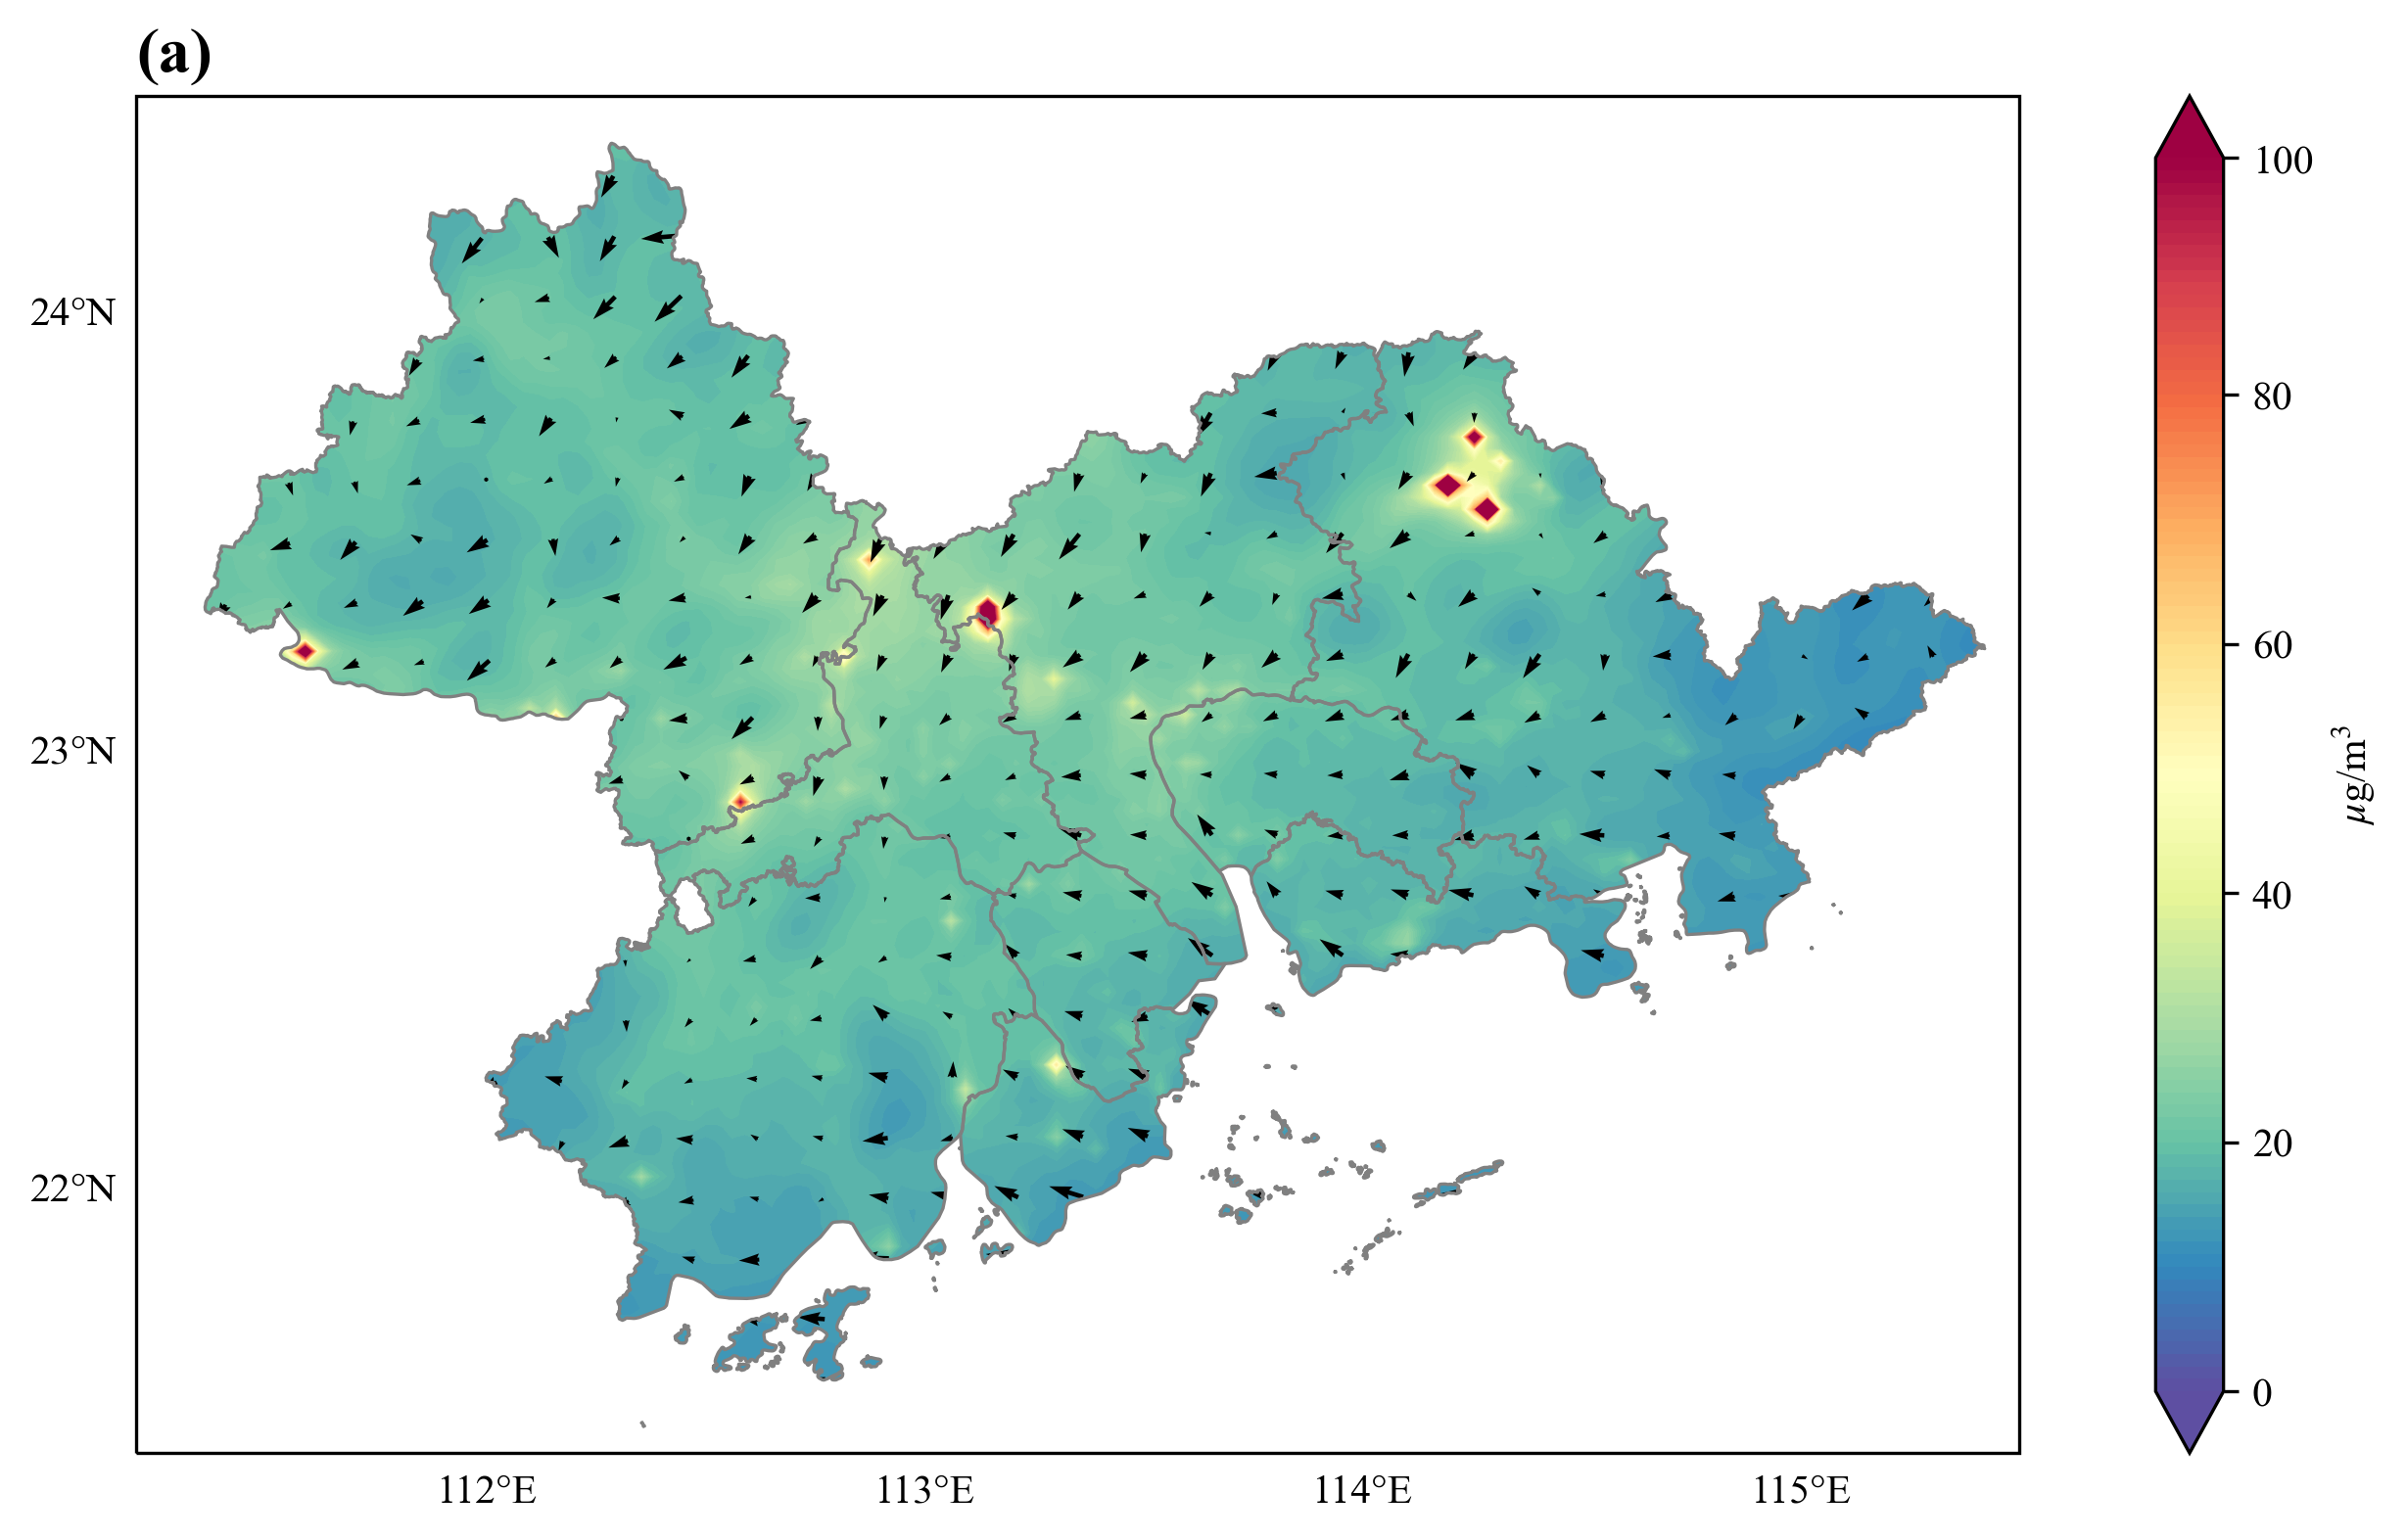

In [13]:
plot_PRD_map(avg_low, cmin, cmax, cmstep, cbstep,
             mean_low, uwind_low, vwind_low,
             ngrid=5, scale=100, headwidth=3,
             title='(a)', colorbar_label='$\mu$g/m$^3$')

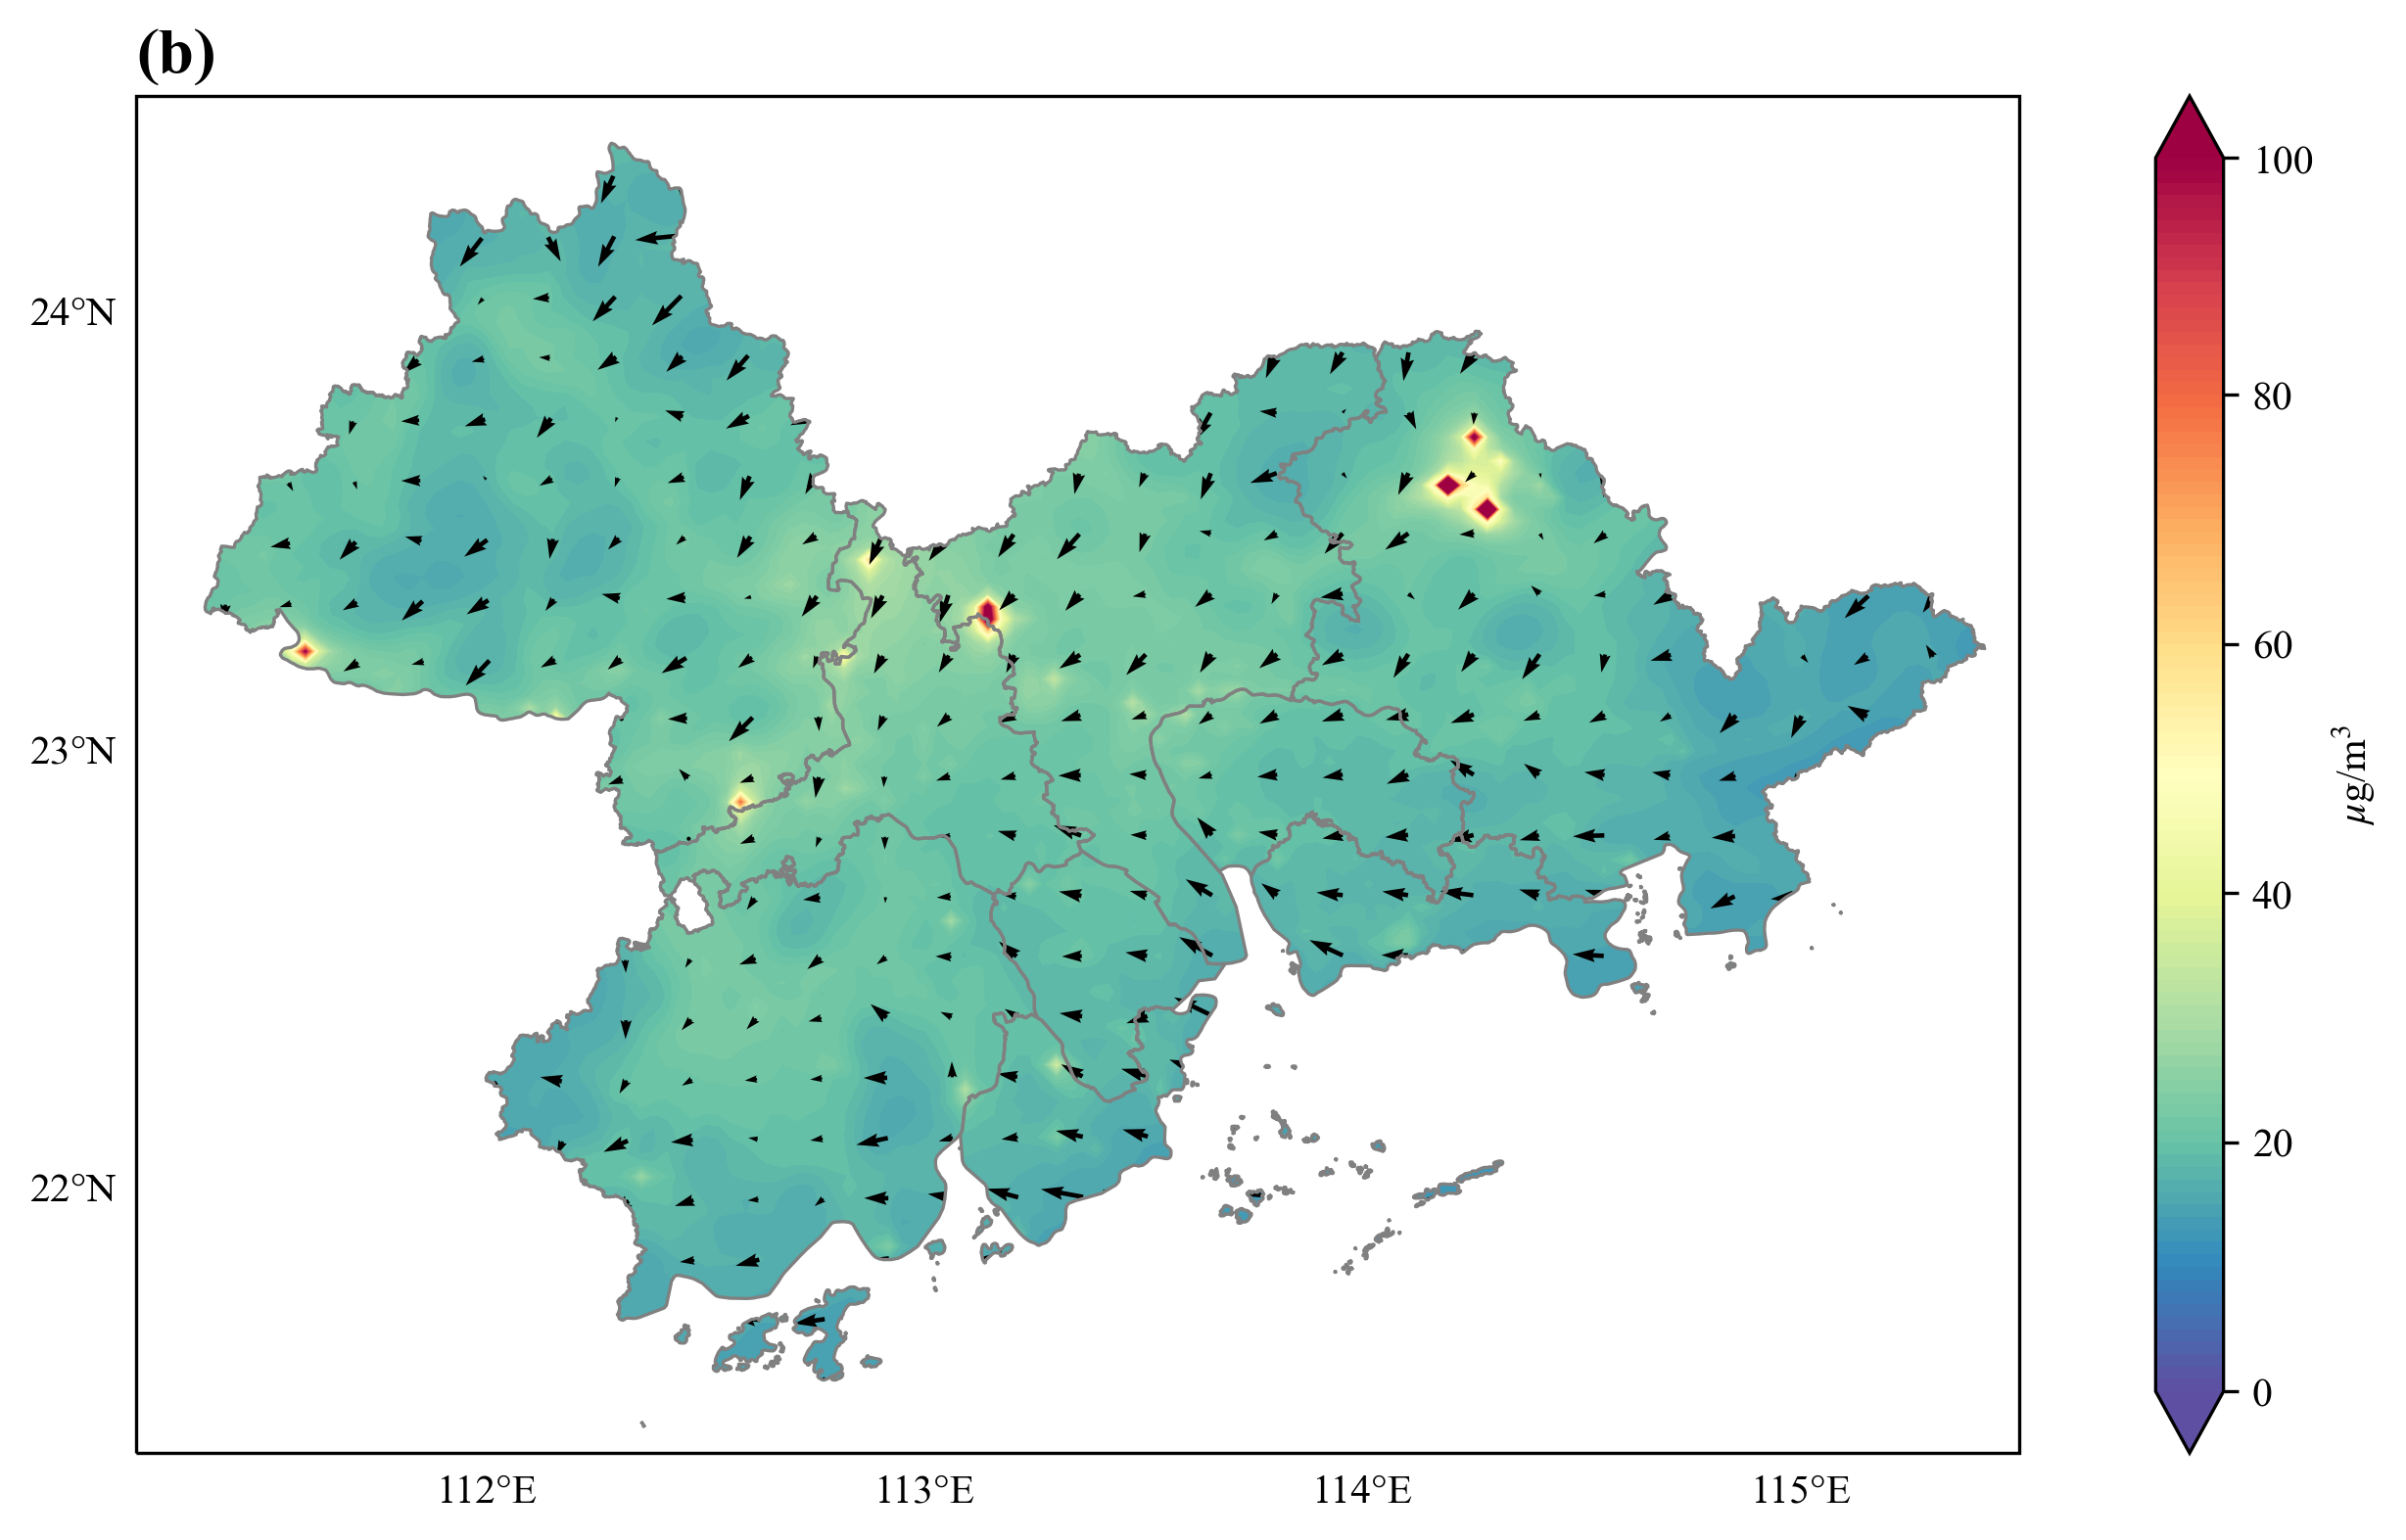

In [14]:
plot_PRD_map(avg_low, cmin, cmax, cmstep, cbstep,
             mean_high, uwind_high, vwind_high,
             ngrid=5, scale=100, headwidth=3,
             title='(b)', colorbar_label='$\mu$g/m$^3$')

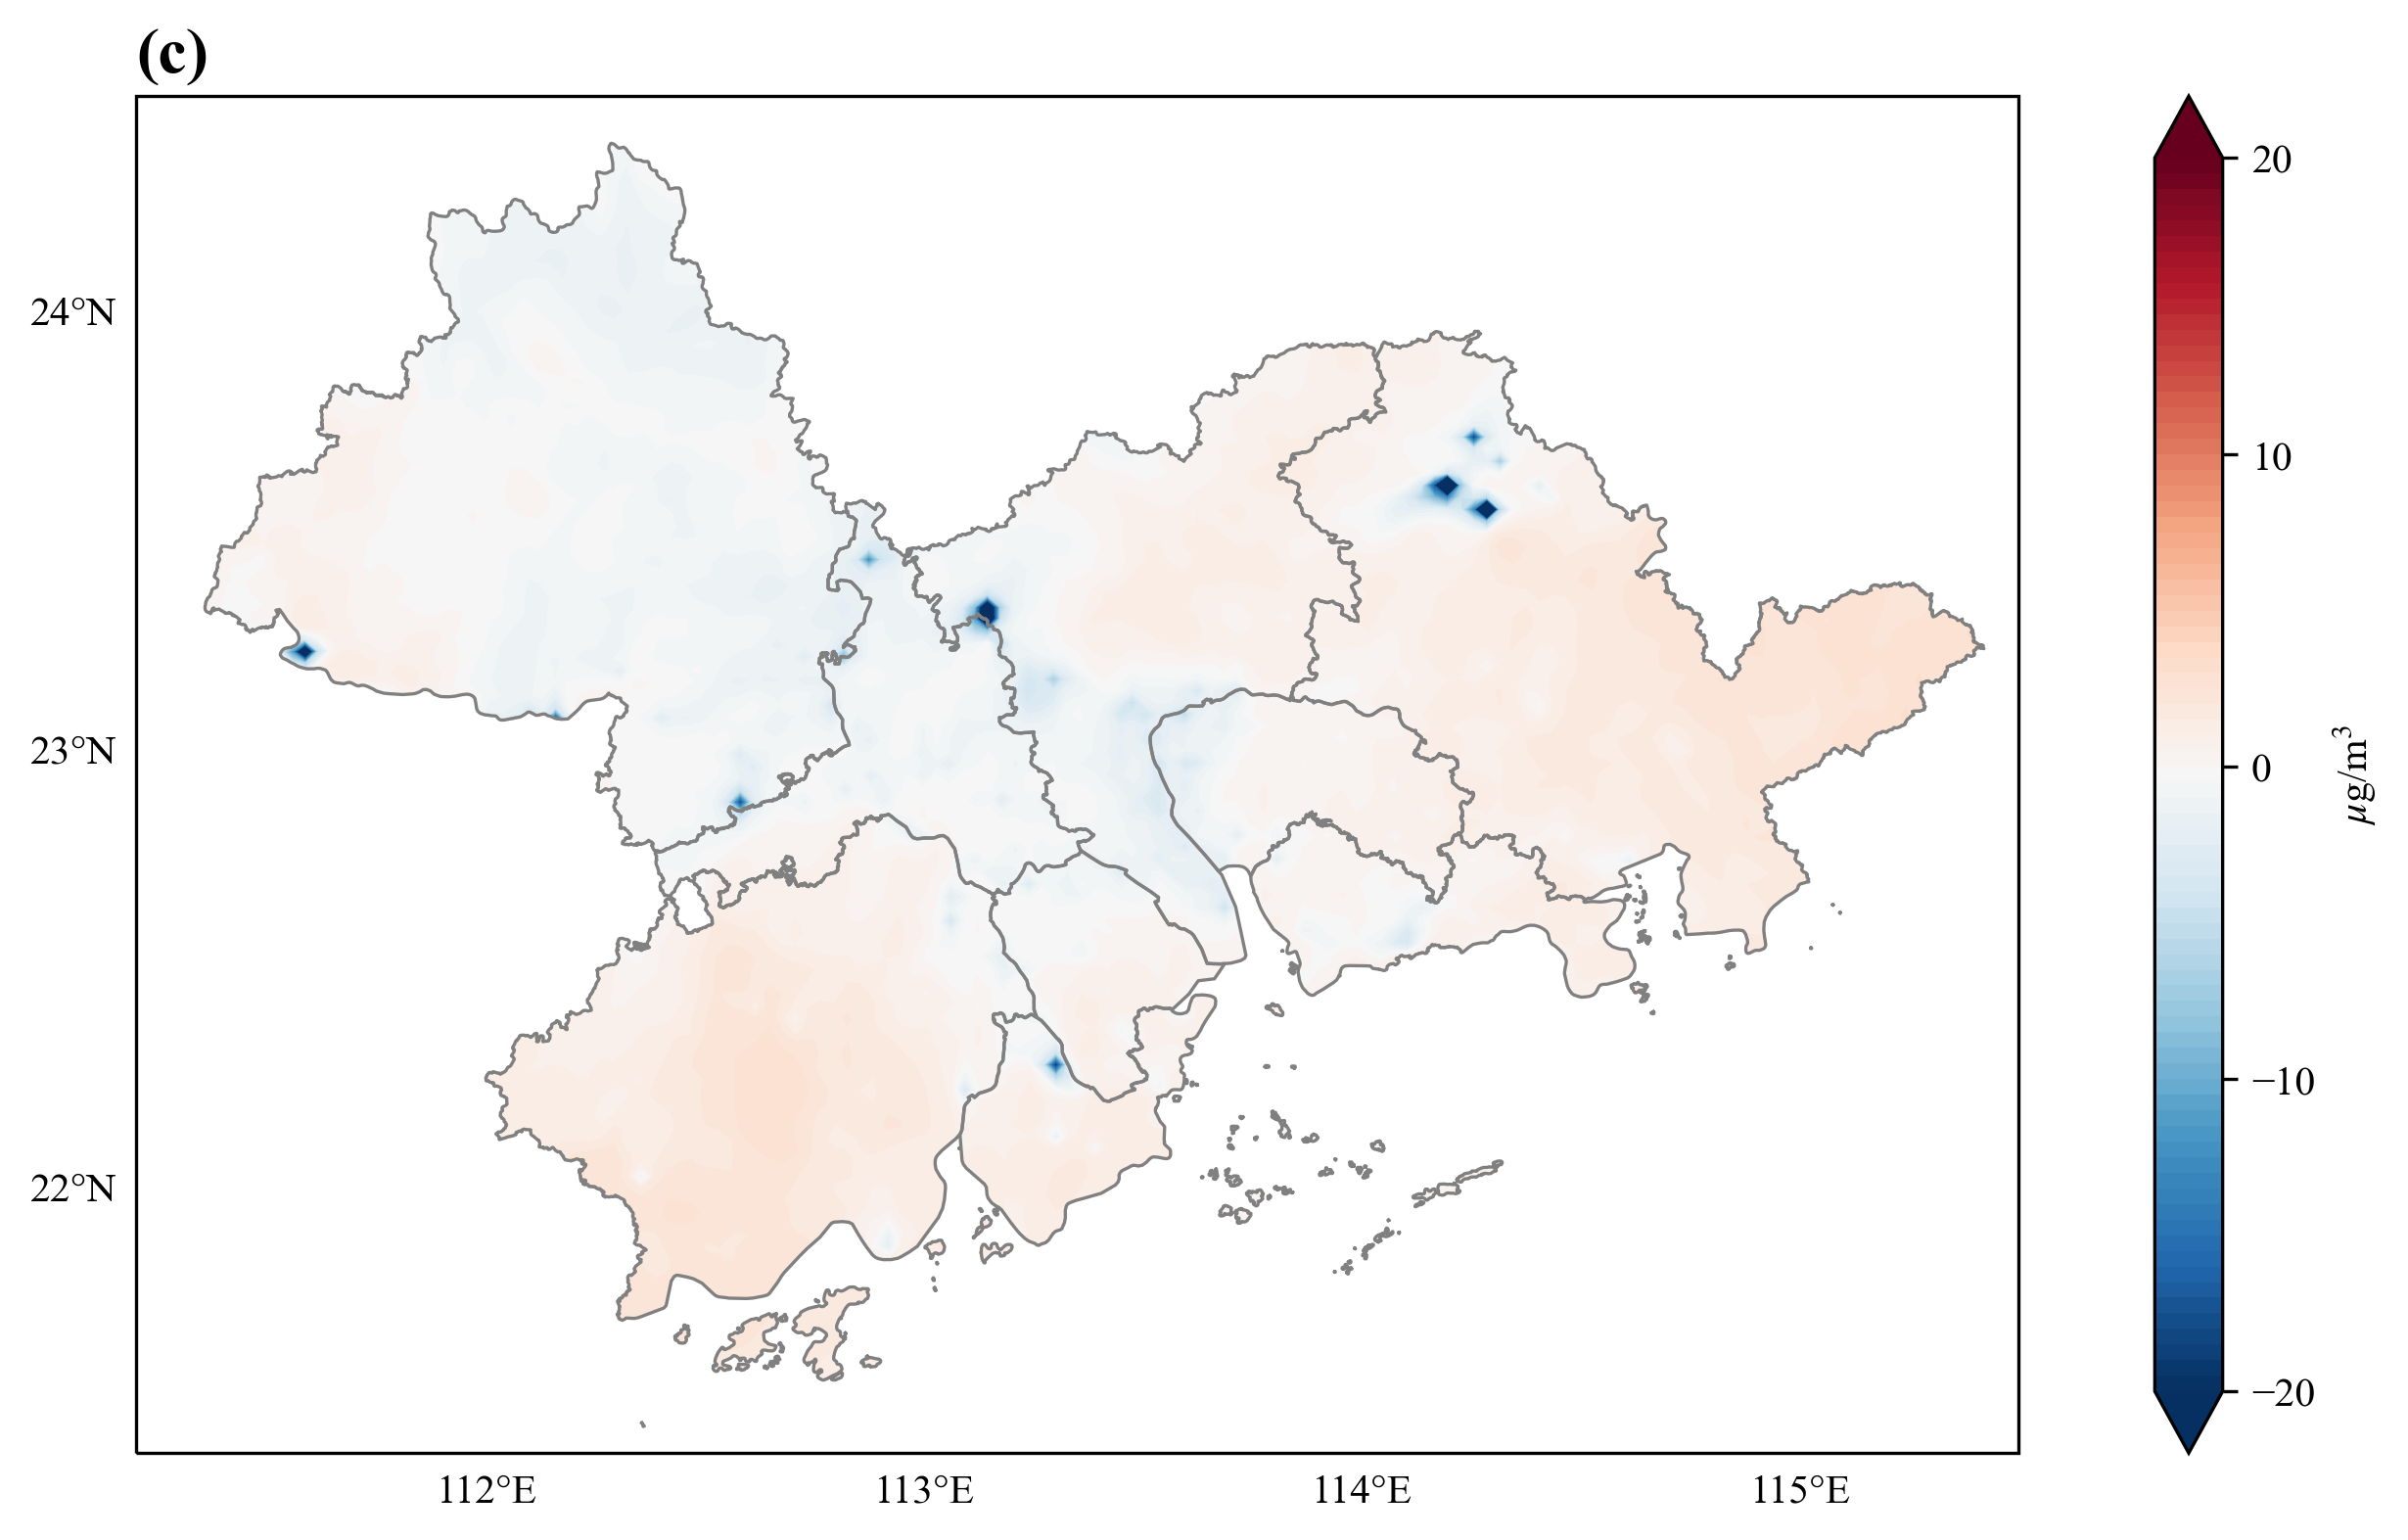

In [15]:
cmin = -20
cmax = 20
cmstep = 0.5
cbstep = 10

plot_PRD_diff(avg_low, cmin, cmax, cmstep, cbstep,
              mean_low, mean_high,
              title='(c)', colorbar_label='$\mu$g/m$^3$')